<h2><p style=' color:Black;' >Tutorial</h2>
Before starting, remember to activate the environment: <b>source env/bin/activate</b> 




In [1]:
from intrinsic_dimension import intrinsic_dimension, section_intrinsic_dimension
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import logging
from moleculekit.molecule import Molecule

<h3><p style=' color:Black;' >Computing Intrinsic Dimension</h3>

<h4><p style=' color:MediumVioletRed;' >Example 1</h4>     
Load topology and trajectory (minimum 101 frames). <br> 

Metrics "Distances" and "Dihedrals" have default parameters: <br>  
- Distances = "sele": "name CA", "step": 1, "metric": "distances"  <br>
- Dihedrals = "dihedrals": ("phi", "psi"), "sincos": False <br>

Similarly, "local" and "global" intrinsic dimension methods have default parameters (valid for both): <br>
- "estimator": "TwoNN"  <br>
- "last": int(100)  <br>


In [6]:
mean_all, mean_last, local_id = intrinsic_dimension(topology = 'myoglobin/myo_noh_1dwr_tip4p.pdb', trajectory = 'myoglobin/myo_noh_300.xtc', projection_method='Dihedrals', id_method='local')

print('Mean instantaneous ID of the entire trajectory:', mean_all)
print('Mean instantaneous ID of the last 100 frames:', mean_last)
print('Istantaneous ID of the entire trajectory:', local_id)

intrinsic_dimension.intrinsic_dimension - INFO - Built-in projection "Dihedrals" computed.
intrinsic_dimension.intrinsic_dimension - INFO - Computing local intrinsic dimension using estimator "TwoNN" (last simulation section = 100 frames).


Mean instantaneous ID of the entire trajectory: 12.462616524212551
Mean instantaneous ID of the last 100 frames: 12.464813064235308
Istantaneous ID of the entire trajectory: [12.63938514 12.25231996 12.52420405 12.63647994 12.25718849 12.65279308
 12.27447019 12.29728478 12.3920995  12.6443908  12.33743311 12.62313694
 12.59588149 12.61086086 12.63647994 12.30896116 12.39032541 12.32803955
 12.67309519 12.38127276 12.42895588 12.4441556  12.38935018 12.32086401
 12.30633109 12.36304428 12.58047446 12.34925244 12.38639616 12.33750467
 12.54531956 12.48210522 12.34189931 12.32718267 12.65938848 12.34083897
 12.37700326 12.44867408 12.51214286 12.54531956 12.3615692  12.59232612
 12.575202   12.42502844 12.66152104 12.61355024 12.42785341 12.58047446
 12.38654061 12.54793309 12.5690502  12.47300748 12.41210197 12.47893536
 12.6168491  12.46253282 12.51872209 12.38194228 12.53170013 12.34132266
 12.61124999 12.3983702  12.5555489  12.31860753 12.43034285 12.56013823
 12.5566211  12.4087940

<h4><p style=' color:MediumVioletRed;' >Example 2</h4> 
Create a Moleculekit Molecule object outside the function.

In [7]:
#load molecule and trajectory first
mol = Molecule('myoglobin/myo_noh_1dwr_tip4p.pdb', validateElements = False) #validateElements ignores the atom type (needed for tip4p's "M" particle)
mol.read('myoglobin/myo_noh_300.xtc')

mean_all, mean_last, local_id = intrinsic_dimension(mol = mol, projection_method='Dihedrals', id_method='local')

print('Mean instantaneous ID of the entire trajectory:', mean_all)
print('Mean instantaneous ID of the last 100 frames:', mean_last)
print('Istantaneous ID of the entire trajectory:', local_id)

intrinsic_dimension.intrinsic_dimension - INFO - Built-in projection "Dihedrals" computed.
intrinsic_dimension.intrinsic_dimension - INFO - Computing local intrinsic dimension using estimator "TwoNN" (last simulation section = 100 frames).


Mean instantaneous ID of the entire trajectory: 12.462616524212551
Mean instantaneous ID of the last 100 frames: 12.464813064235308
Istantaneous ID of the entire trajectory: [12.63938514 12.25231996 12.52420405 12.63647994 12.25718849 12.65279308
 12.27447019 12.29728478 12.3920995  12.6443908  12.33743311 12.62313694
 12.59588149 12.61086086 12.63647994 12.30896116 12.39032541 12.32803955
 12.67309519 12.38127276 12.42895588 12.4441556  12.38935018 12.32086401
 12.30633109 12.36304428 12.58047446 12.34925244 12.38639616 12.33750467
 12.54531956 12.48210522 12.34189931 12.32718267 12.65938848 12.34083897
 12.37700326 12.44867408 12.51214286 12.54531956 12.3615692  12.59232612
 12.575202   12.42502844 12.66152104 12.61355024 12.42785341 12.58047446
 12.38654061 12.54793309 12.5690502  12.47300748 12.41210197 12.47893536
 12.6168491  12.46253282 12.51872209 12.38194228 12.53170013 12.34132266
 12.61124999 12.3983702  12.5555489  12.31860753 12.43034285 12.56013823
 12.5566211  12.4087940

<h4><p style=' color:MediumVioletRed;' >Example 3</h4>
Define extra arguments (or modify the default ones). <br> 
Kwargs are organised in: <br>
- projection_kwargs(), referred to the projection type selected; <br>
- id_kwargs(), referred to the intrinsic dimension computation (local/global parameters).<br>
projection_kwargs are required in all cases exccept Dihedrals and Distances, which have default parameters as described in example 1.

In [8]:
proj = {'atomsel':'name CA','refmol':mol} #kwargs required by Coordinate method

#load molecule and trajectory
mol = Molecule('myoglobin/myo_noh_1dwr_tip4p.pdb', validateElements = False) #validateElements ignores the atom type (needed for tip4p's M particle)
mol.read('myoglobin/myo_noh_300.xtc')

global_all, global_last100 = intrinsic_dimension(mol=mol, projection_method='Coordinate', id_method='global', projection_kwargs=proj)

print('Global ID of the entire trajectory:', global_all)
print('Global ID of the last 100 frames:', global_last100)

2025-07-02 14:41:50,275 - moleculekit.molecule - WARNING - Wrapping detected 80 bonds and 2484 atoms. Ignore this message if you believe this is correct, otherwise make sure you have loaded a topology containing all the bonds of the system before wrapping. The results may be inaccurate. If you want to use guessed bonds use the guessBonds argument.
intrinsic_dimension.intrinsic_dimension - INFO - Used moleculekit metric projection: MetricCoordinate from moleculekit.projections.metriccoordinate
intrinsic_dimension.intrinsic_dimension - INFO - Computing global intrinsic dimension using estimator "TwoNN" (last simulation section = 100 frames).


Global ID of the entire trajectory: 18.635546971814737
Global ID of the last 100 frames: 19.774953097601355


<h3><p style=' color:Black;' >Computing Intrinsic Dimension of Protein's Section</h3>

<h4><p style=' color:MediumVioletRed;' >Example 4</h4>  
Similar to intrinisc_dimension(), with two extra parameters required: <br>
- window_size (default 10); <br>
- stride (default 1). <br>
Returns a DataFrame.



In [2]:
results = section_intrinsic_dimension(topology = 'myoglobin/myo_noh_1dwr_tip4p.pdb', trajectory = 'myoglobin/myo_noh_300.xtc', window_size=15, stride=5 , projection_method='Dihedrals', id_method='local')
results.head()

intrinsic_dimension.section_intrinsic_dimension - INFO - Protein has 153 amino acids. Slicing in 27 windows of 15 amino acids each and 5 aminos stride.
intrinsic_dimension.section_intrinsic_dimension - INFO - Last 3 amino acids will be ingored.
intrinsic_dimension.section_intrinsic_dimension - INFO - Computing local Intrinsic Dimension from Dihedrals.


,window_index,resids,entire simulation,last simulation,instantaneous
0,001,"(1, 15)",11.872584,11.873683,"[11.939727047363164, 11.798754784735072, 11.78..."
1,006,"(6, 20)",14.235811,14.227232,"[14.273448472706413, 14.179781494335032, 14.23..."
2,011,"(11, 25)",13.710344,13.710242,"[13.714371247585445, 13.728933659292691, 13.71..."
3,016,"(16, 30)",11.447558,11.446090,"[11.467234954601087, 11.440515743129188, 11.44..."
4,021,"(21, 35)",15.543218,15.546694,"[15.52633910496367, 15.535759239711869, 15.568..."


<h3><p style=' color:Black;' >Plotting Intrinsic Dimension</h3>

<h4><p style=' color:MediumVioletRed;' >Example 5</h4>   


intrinsic_dimension.intrinsic_dimension - INFO - Built-in projection "Dihedrals" computed.
intrinsic_dimension.intrinsic_dimension - INFO - Computing local intrinsic dimension using estimator "TwoNN" (last simulation section = 100 frames).


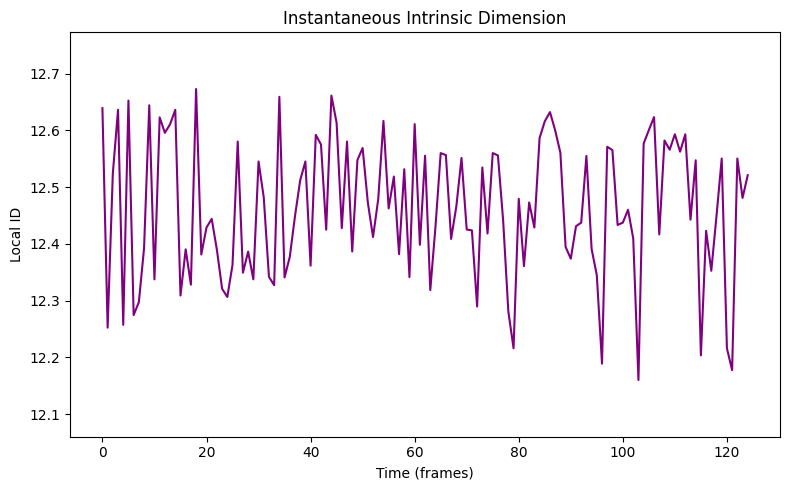

In [11]:
mean_all, mean_last, local_id = intrinsic_dimension(topology = 'myoglobin/myo_noh_1dwr_tip4p.pdb', trajectory = 'myoglobin/myo_noh_300.xtc', projection_method='Dihedrals', id_method='local')

time = np.arange(0, len(local_id))
plt.figure(figsize=(8, 5))
plt.plot(time, local_id, linestyle='-', color='purple', linewidth= 1.5)
plt.xlabel("Time (frames)")
plt.ylim(min(local_id) -0.1, max(local_id) + 0.1)
plt.ylabel("Local ID")
plt.title("Instantaneous Intrinsic Dimension")
#plt.grid(True)
plt.tight_layout()
plt.show()

<h4><p style=' color:MediumVioletRed;' >Example 6</h4>   
Using multiple, indipendent trajectory. In this case, with varying temperatures.




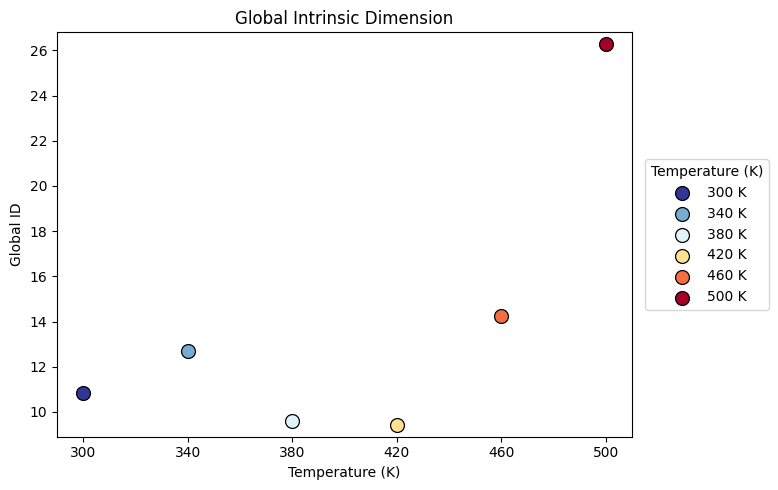

In [12]:
proj = {'dihedrals':'psi'} #changed default angles to compute
temperatures=[300, 340, 380, 420, 460, 500]
results=[]
for t in temperatures: #using verbose=False to remove multiple logging infos
    global_all, gid100 = intrinsic_dimension(topology='myoglobin/myo_noh_1dwr_tip4p.pdb', trajectory=f'myoglobin/myo_noh_{t}.xtc', projection_method='Dihedrals', id_method='global' , projection_kwargs=proj, verbose=False)
    results.append({
        'temperature': t,
        'mean_all': global_all,
        'mean_last': gid100,
            })
results=pd.DataFrame(results)
    
plt.figure(figsize=(8, 5))
color_vec = np.linspace(0, 1, len(temperatures))
color = cm.RdYlBu_r(color_vec)
for t, c in zip(results['temperature'], color):
    value = results[results['temperature'] == t]['mean_all'].values[0]
    plt.scatter(t, value, color=c, edgecolor='black', linewidth=0.9, s=100, label=f'{t} K')
plt.xlabel("Temperature (K)")
plt.xticks(temperatures)
plt.ylim(min(results['mean_all']) -0.5, max(results['mean_all']) + 0.5)
plt.ylabel("Global ID")
plt.title("Global Intrinsic Dimension")
plt.legend(bbox_to_anchor=(1.25, 0.5), loc="center right", title="Temperature (K)")
plt.tight_layout()
_=plt.show()

<h4><p style=' color:MediumVioletRed;' >Example 7</h4>   
Plotting protein's sections. <br>


intrinsic_dimension.section_intrinsic_dimension - INFO - Protein has 153 amino acids. Slicing in 27 windows of 15 amino acids each and 5 aminos stride.
intrinsic_dimension.section_intrinsic_dimension - INFO - Last 3 amino acids will be ingored.
intrinsic_dimension.section_intrinsic_dimension - INFO - Computing local Intrinsic Dimension from Dihedrals.


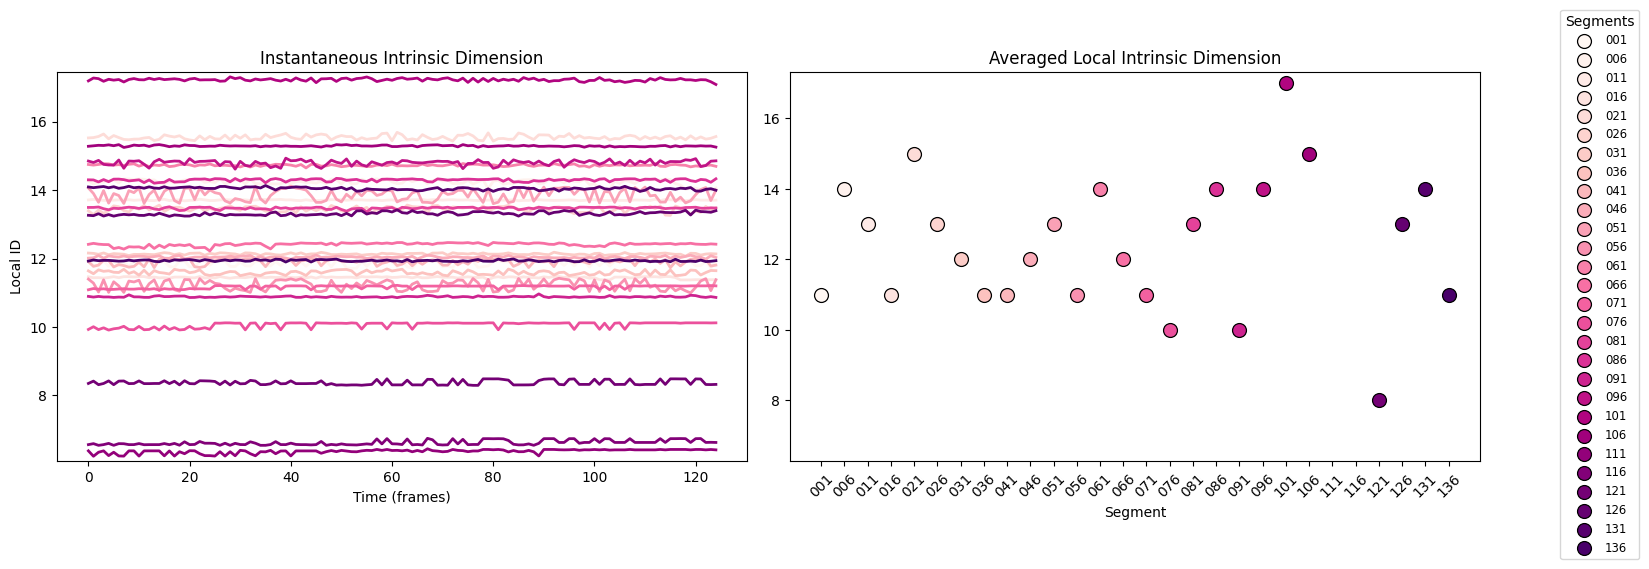

In [3]:
results = section_intrinsic_dimension(topology = 'myoglobin/myo_noh_1dwr_tip4p.pdb', trajectory = 'myoglobin/myo_noh_300.xtc', window_size=15, stride=5 , projection_method='Dihedrals', id_method='local')

#IGNORE (remove matplotlib info warning)
logging.basicConfig(level='INFO')
mlogger = logging.getLogger('matplotlib')
mlogger.setLevel(logging.WARNING)

fig, ax = plt.subplots(nrows=1, ncols=2 , figsize=(15, 5) )
time = np.arange(0, len(results['instantaneous'][0])) #length of the simulation is the same for every section
cmap = plt.cm.RdPu
colors = cmap(np.linspace(0, 1, len(results)))
for (idx, row), color in zip(results.iterrows(), colors):
    ax[0].plot(time,row['instantaneous'],color=color, linewidth= 2)
ax[0].set_xlabel("Time (frames)")
all_values = np.concatenate(results["instantaneous"].values)
ax[0].set_ylim(all_values.min() - 0.15, all_values.max() + 0.15)
ax[0].set_ylabel("Local ID")
ax[0].set_title("Instantaneous Intrinsic Dimension")

for t, c in zip(results['window_index'], colors):
    value = results[results['window_index'] == t]['entire simulation']
    ax[1].scatter(t, value.astype(int), color = c, edgecolor = 'black', linewidth = 0.9, s = 100, label = f'{t}')
ax[1].set_xlabel('Segment')
ax[1].set_ylim(results['entire simulation'].min() - 0.1, results['entire simulation'].max() + 0.1)
ax[1].set_title("Averaged Local Intrinsic Dimension")
for tick in ax[1].get_xticklabels():
    tick.set_rotation(45)

handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels,bbox_to_anchor=(1.10, 0.5), loc='center right', fontsize='small', title='Segments')
plt.tight_layout()
fig.show()


<h4><p style=' color:MediumVioletRed;' >Example 8</h4>   


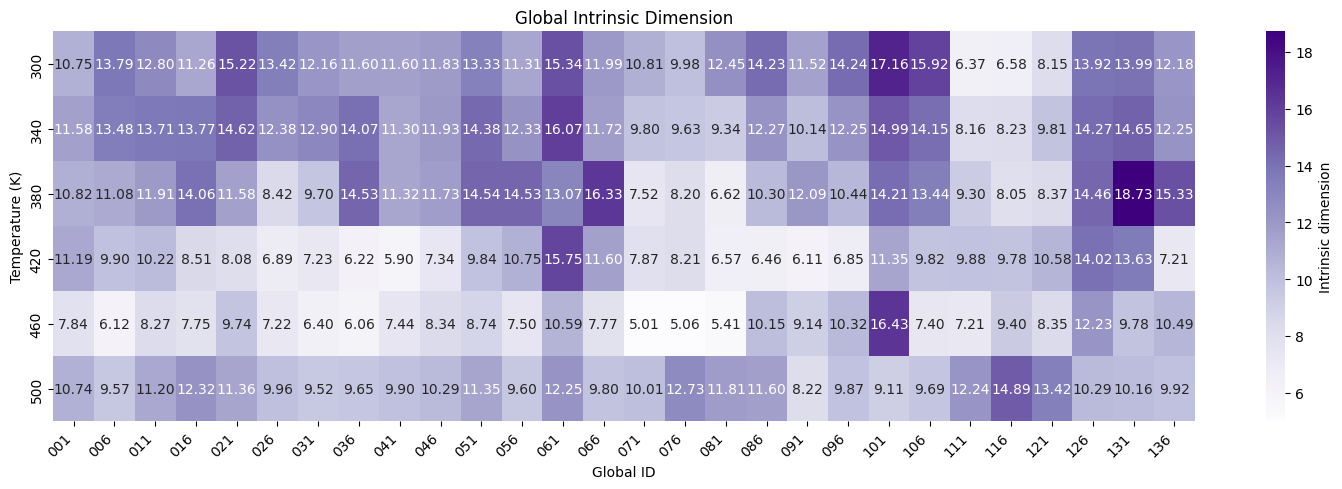

In [14]:
temperatures = [300, 340, 380, 420, 460, 500]
results=[]

for t in temperatures:
    result = section_intrinsic_dimension(topology='myoglobin/myo_noh_1dwr_tip4p.pdb', trajectory=f'myoglobin/myo_noh_{t}.xtc', window_size=15, stride=5, projection_method='Dihedrals', id_method='global', verbose = False )
    result['temperature'] = t
    results.append(result)
combined_results = pd.concat(results, ignore_index=True)

grouped_data = combined_results.groupby(['temperature', 'window_index'], as_index=False)['entire simulation'].mean()
grouped_data.rename(columns={'temperature': 'Temperature $T$ (K)','window_index': 'Segment'}, inplace=True)
pivot_data = grouped_data.pivot(index='Temperature $T$ (K)', columns='Segment', values='entire simulation')
plt.figure(figsize=(15, 5)) 
_=sns.heatmap(pivot_data, cmap = "Purples", annot = True,fmt=".2f", cbar_kws={'label': 'Intrinsic dimension'}) #, square=True
plt.ylabel("Temperature (K)")
plt.xlabel("Global ID")
plt.xticks(rotation=45, ha='right')
plt.title("Global Intrinsic Dimension")
plt.tight_layout()
_=plt.show()

